In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('E:/NTI/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [3]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [4]:
x = df['Age'].values
y = df['Purchased'].values
x

array([35, 40, 49, 40, 25, 47, 46, 42, 30, 41, 42, 47, 32, 27, 42, 33, 35,
       35, 46, 39, 39, 49, 54, 41, 31, 24, 40, 40, 48, 38, 45, 32, 37, 41,
       44, 47, 38, 39, 42, 26, 21, 59, 39, 43, 49, 37, 49, 28, 59, 40, 38,
       51, 55, 23, 49, 49, 48, 49, 43, 35, 50, 48, 49, 38, 27, 35, 35, 43,
       41, 39, 45, 51, 20, 41, 58, 50, 28, 34, 57, 50, 49, 53, 42, 27, 59,
       51, 49, 32, 30, 27, 36, 60, 38, 29, 61, 33, 45, 26, 30, 38, 28, 50,
       26, 39, 26, 51, 36, 47, 18, 43, 61, 41, 31, 29, 48, 38, 59, 33, 35,
       28, 30, 36, 40, 33, 36, 49, 40, 20, 37, 47, 36, 40, 59, 36, 42, 27,
       32, 48, 38, 62, 38, 40, 57, 41, 22, 40, 39, 39, 41, 28, 39, 25, 43,
       48, 37, 36, 32, 51, 30, 36, 30, 63, 48, 36, 31, 58, 22, 46, 63, 33,
       35, 41, 26, 44, 39, 52, 53, 43, 51, 55, 60, 38, 24, 56, 56, 37, 61,
       44, 45, 55, 51, 50, 26, 19, 43, 31, 39, 53, 44, 47, 59, 42, 38, 41,
       35, 52, 51, 20, 45, 62, 54, 49, 20, 43, 27, 23, 58, 61, 21, 34, 19,
       42, 47, 20, 36, 40

In [5]:
y

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [6]:
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std
m = len(y)

In [7]:
x_mean

40.106

x norm= x−μ/σ



In [8]:
X = np.c_[np.ones((m, 1)), x_norm]
X

array([[ 1.        , -0.47711966],
       [ 1.        , -0.00990495],
       [ 1.        ,  0.83108153],
       ...,
       [ 1.        , -1.13122026],
       [ 1.        ,  0.73763859],
       [ 1.        ,  0.36386682]])

In [9]:
theta = np.zeros(X.shape[1])  # [b0, b1]
theta

array([0., 0.])

𝑓(𝑧)=  1/(1+𝑒^(−𝑧) )  =   1/(1+𝑒^(−(𝑤𝑥+𝑏)) )  segmoid function

log loss = - 𝟏/𝑵 ∑_(𝒊=𝟏)^𝑵〖(𝒚〗_𝒊  log((𝒚_𝒊 ) ̂))+ (〖𝟏− 𝒚〗_𝒊) log(1-(𝒚_𝒊 ) ̂ )


In [10]:
for _ in range(1000):
    z = X @ theta
    h = 1 / (1 + np.exp(-z))  # sigmoid مباشرة
    gradient = X.T @ (h - y) / m
    diag = h * (1 - h)
    H = X.T @ (X * diag.reshape(-1, 1)) / m
    theta -= np.linalg.inv(H) @ gradient

In [11]:
b0, b1 = theta
print(" b0:", b0)
print(" b1:", b1)

 b0: -0.6407378661598601
 b1: 1.9547721438849956


In [19]:
z_pred = X @ theta
h_pred = 1 / (1 + np.exp(-z_pred))
y_pred = (h_pred >= 0.5).astype(int)

accuracy = np.mean(y_pred == y)
print("Manual Accuracy:", round(accuracy * 100, 2), "%")



b0, b1 = theta
print("b0:", b0)
print("b1:", b1)

Manual Accuracy: 81.1 %
b0: -0.6407378661598601
b1: 1.9547721438849956


In [12]:
x_range = np.linspace(min(x), max(x), 300)
x_range_norm = (x_range - x_mean) / x_std
X_plot = np.c_[np.ones((len(x_range), 1)), x_range_norm]
z_plot = X_plot @ theta
y_probs = 1 / (1 + np.exp(-z_plot)) 

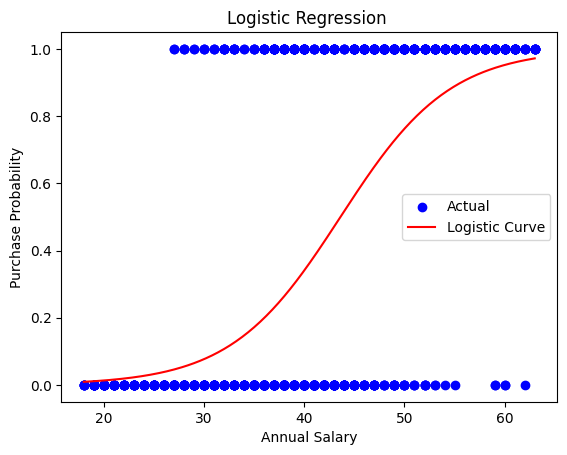

In [13]:
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x_range, y_probs, color='red', label='Logistic Curve')
plt.xlabel('Annual Salary')
plt.ylabel('Purchase Probability')
plt.title('Logistic Regression ')
plt.legend()
plt.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('E:/NTI/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [34]:
x=df.iloc[:,2:3]
x

,Age
0,35
1,40
2,49
3,40
4,25
...,...
995,38
996,47
997,28
998,48


In [35]:
y=df.iloc[:,4:5]
y

,Purchased
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [46]:
model = LogisticRegression(penalty=None)  
model.fit(x_scaled, y)


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty=None)

In [47]:
y_pred = model.predict(x_scaled)
probs = model.predict_proba(x_scaled)[:, 1]   

In [48]:
accuracy = accuracy_score(y, y_pred)
plenty_0 = np.sum(y_pred == 0)


In [49]:
print("Sklearn Accuracy:", round(accuracy * 100, 2), "%")
print("Predicted = 0 (Plenty):", plenty_0)
print("Intercept (b0):", model.intercept_[0])
print("Coefficient (b1):", model.coef_[0][0])

Sklearn Accuracy: 81.1 %
Predicted = 0 (Plenty): 647
Intercept (b0): -0.6407378686145526
Coefficient (b1): 1.9547721449859319
